This is the Group 9 Project Report ipynb File!

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

In [2]:
url <- "https://raw.githubusercontent.com/EPICxFLIPPER/data/main/OnlineNewsPopularity.csv"
popularity <- read_csv(url)
head(popularity)

Rows: 39644 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): url
dbl (60): timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_no...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8,-0.3696970,-0.600,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0,-0.2201923,-0.500,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.13636364,0.6,-0.1950000,-0.400,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855


In [3]:
set.seed(9)
#Wrangling
popularity_tidy <- popularity |> 
#removing columns that are specifically not litsted as predictors as well as columns that self reference articles.
select(shares,n_tokens_content) |>
drop_na(n_tokens_content, shares)



glimpse(popularity_tidy)

Rows: 39,644
Columns: 2
$ shares           <dbl> 593, 711, 1500, 1200, 505, 855, 556, 891, 3600, 710, …
$ n_tokens_content <dbl> 219, 255, 211, 531, 1072, 370, 960, 989, 97, 231, 124…


In [4]:
set.seed(9)
popularity_sample <- sample_n(popularity_tidy, 500)

In [5]:
set.seed(9)
#Splitting the data into training and testing data
#Strata = the day the article was published
popularity_split<- initial_split(popularity_sample, prop = .70, strata = shares)
popularity_train<- training(popularity_split)
popularity_test <- testing(popularity_split)


In [6]:
set.seed(9)
initial_table <- popularity_train |>
map_df(mean, na.rm =TRUE)
initial_table

summary <- summary(popularity_train)
summary

shares,n_tokens_content
<dbl>,<dbl>
4137.52,597.319


     shares         n_tokens_content
 Min.   :    86.0   Min.   :   0.0  
 1st Qu.:   991.8   1st Qu.: 267.5  
 Median :  1500.0   Median : 461.5  
 Mean   :  4137.5   Mean   : 597.3  
 3rd Qu.:  2925.0   3rd Qu.: 770.0  
 Max.   :128800.0   Max.   :4894.0  

Warning message:
“Removed 8 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


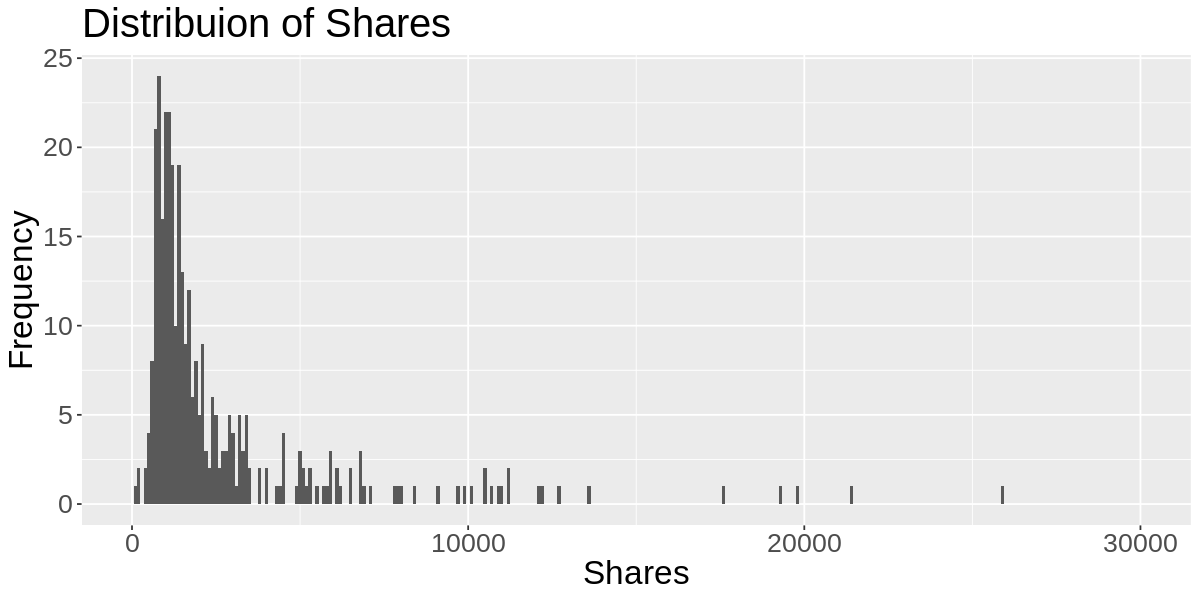

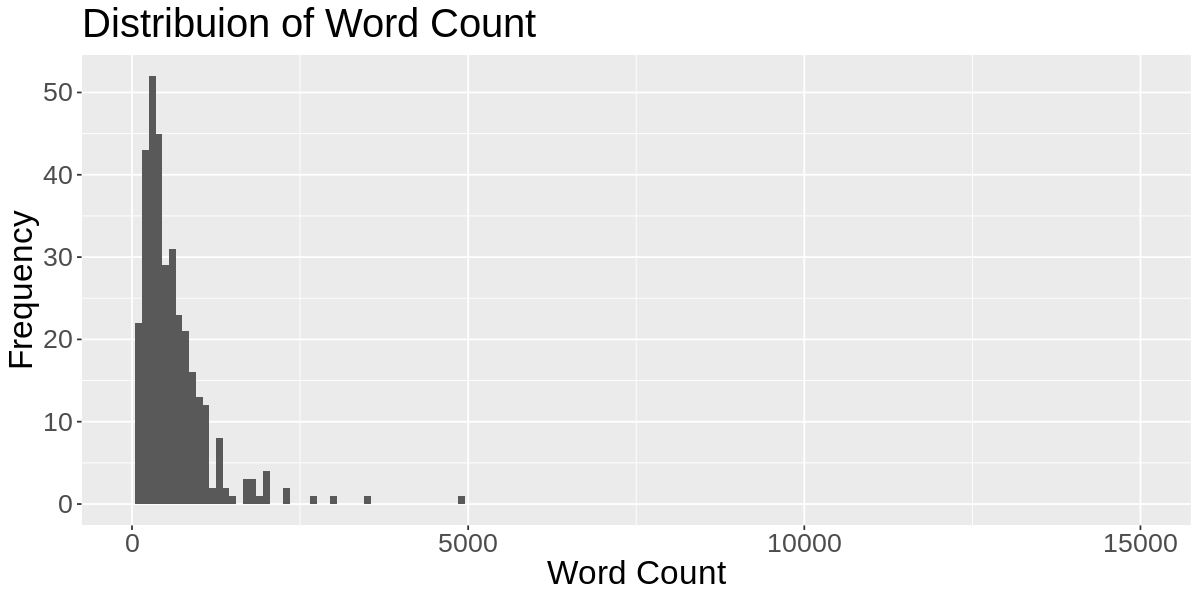

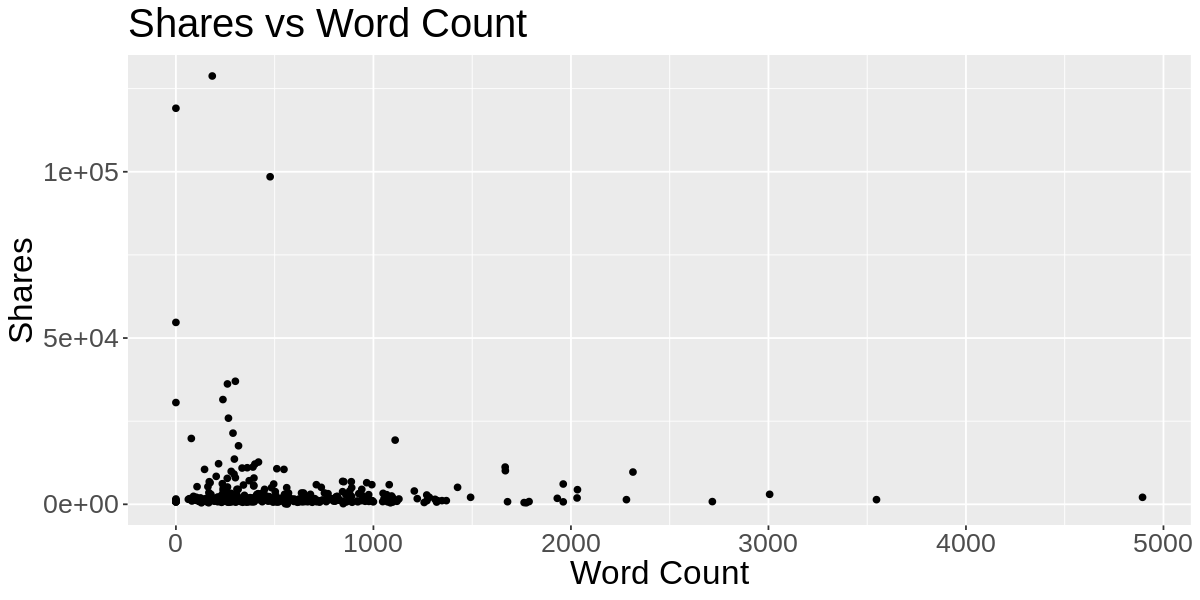

In [7]:
set.seed(9)
#Below are the distributions of the 3 most varable categoreis in our data set. Though some of the categories are less variable, we belive 
#they will still be good predictors of shares.

options(repr.plot.width = 10, repr.plot.height =5)

shares_plot <- popularity_train |> 
ggplot(aes(x = shares)) + geom_histogram(binwidth = 100)+xlim(0,30000) +labs(x = "Shares" , y = "Frequency") +
ggtitle("Distribuion of Shares") + theme(text = element_text(size = 20))

words_plot <- popularity_train |> 
ggplot(aes(x = n_tokens_content)) + geom_histogram(binwidth = 100)+xlim(0,15000) +labs(x = "Word Count" , y = "Frequency") +
ggtitle("Distribuion of Word Count") + theme(text = element_text(size = 20))


shares_vs_word_count_plot <- popularity_train |>
ggplot(aes(x = n_tokens_content , y = shares)) + geom_point() + xlab("Word Count") + ylab("Shares") + ggtitle("Shares vs Word Count") +
theme(text = element_text(size = 20))

shares_plot
words_plot
shares_vs_word_count_plot


In [8]:
#I will be loacting the best neighbors to use
set.seed(9)
popularity_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = tune()) |> 
set_engine("kknn") |> 
set_mode("regression")

popularity_recipe <- recipe(shares~n_tokens_content, data = popularity_train) |> 
step_scale(all_predictors()) |> 
step_center(all_predictors())

gridvals <- tibble(neighbors = seq(from = 1, to = 10,))
popularity_vfold <- vfold_cv(data = popularity_train, v = 5, strata = shares)

popularity_fit <- workflow() |>
add_recipe(popularity_recipe) |>
add_model(popularity_spec) |>
tune_grid(resamples = popularity_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "rmse") |>
arrange(mean) |>
select(neighbors) |>
slice(1) |>
pull()



popularity_fit
                   


[1] 7

In [9]:
popularity_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |> 
set_engine("kknn") |> 
set_mode("regression")

popularity_fit_2 <- workflow() |> 
add_recipe(popularity_recipe) |>
add_model(popularity_spec) |>
fit(data = popularity_train)

popularity_predictions <- predict(popularity_fit_2, popularity_test) |> 
bind_cols(popularity_test)

popularity_predictions

Warning message:
“tune samples were requested but there were 348 rows in the data. 343 will be used.”


.pred,shares,n_tokens_content
<dbl>,<dbl>,<dbl>
4148.239,1900,812
4148.239,3000,0
4148.239,1700,962
4148.239,602,155
4148.239,1600,413
4148.239,969,85
4148.239,1200,221
4148.239,2400,311
4148.239,2500,232
